# Scraping the Global Musem
Mariam Barakat

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import os
import json

### Combine all json files into one single file

In [2]:
# Specify the directory where your JSON files are located
json_files_directory = 'data'

# Specify the name of the output combined JSON file
output_json_file = 'combined_Global.json'

# Initialize an empty list to store the combined data
combined_data = []

# Iterate over each JSON file in the directory
for filename in os.listdir(json_files_directory):
    if filename.endswith('.json'):
        # Construct the full path to the JSON file
        file_path = os.path.join(json_files_directory, filename)
        
        # Load the data from the current JSON file
        with open(file_path, 'r') as file:
            data = json.load(file)
            
            # Add a "Path" key with the file name to each dictionary
            data['Path'] = filename
            
            # Append the data from the current file to the combined_data list
            combined_data.append(data)

# Write the combined data to the output JSON file
with open(output_json_file, 'w') as output_file:
    json.dump(combined_data, output_file, indent=2)

print(f'Combined data with "Path" key written to {output_json_file}')



Combined data with "Path" key written to combined_Global_uncleaned.json


### Explore the structure of the file

In [3]:
import json
import pandas as pd
data = json.load(open('combined_Global.json',encoding="utf8"))

#### find all the keys in the file

In [4]:
# Load your JSON file
input_json_file = 'combined_Global.json'

with open(input_json_file, 'r') as file:
    data = json.load(file)

# Find all unique keys in the list of dictionaries
all_keys = set()
for item in data:
    all_keys.update(item.keys())

# Convert the set of keys to a list if needed
all_keys_list = list(all_keys)

# Print or use the list of keys
print("All keys available in the JSON file:")
print(all_keys_list)


All keys available in the JSON file:
['Archaeological Site', 'Technique', 'Diameter', 'Height', 'Inventory number', 'Category', 'Material', 'Dating', 'Description', 'Present location', 'Width', 'Depth', 'Provenance', 'Path', 'Name']


In [5]:
print(len(all_keys_list))

15


In [6]:

# Load your JSON file
input_json_file = 'combined_Global.json'
output_json_file = 'combined_Global.json'

with open(input_json_file, 'r') as file:
    data = json.load(file)

# Find all unique keys in the list of dictionaries
all_keys = set()
for item in data:
    all_keys.update(item.keys())

# Normalize the list of dictionaries
normalized_data = []
for item in data:
    normalized_item = {key: item.get(key, '') for key in all_keys}
    normalized_data.append(normalized_item)

# Write the normalized data to a new JSON file
with open(output_json_file, 'w') as output_file:
    json.dump(normalized_data, output_file, indent=2)

print(f'Normalized data written to {output_json_file}')


Normalized data written to combined_Global.json


### Converting to dataframe

In [7]:
import json
import pandas as pd
data = json.load(open('combined_Global.json',encoding="utf8"))

In [8]:
df = pd.DataFrame(data)

In [9]:
df.head()

,Archaeological Site,Technique,Diameter,Height,Inventory number,Category,Material,Dating,Description,Present location,Width,Depth,Provenance,Path,Name
0,EL-FAIYUM ?,RELIEF,,30 cm,A.1505,RELIEF,LIMESTONE,ROMAN PERIOD,Several Late Period texts mention a lion god n...,KMKG - MRAH [07/003] BRUSSELS,42 cm,12.5 cm,,1.json,Tithoes
1,UNKNOWN,WOVEN,,17 cm,ACO.Tx.0060,COPTIC TEXTILE,WOOL,BYZANTINE PERIOD (not before); COPTIC PERIOD ?...,"This piece of fabric is a so-called ""taquetÃ©'...",KMKG - MRAH [07/003] BRUSSELS,,,,10.json,Fragment of wedge shape
2,GOVERNORATE OF FAIYUM,DOVETAIL (JOINT),10.5 cm,18.5 cm,E.0443,BASKET,RUSH,GRAECO-ROMAN PERIOD,This basket comes from the excavations of B. G...,KMKG - MRAH [07/003] BRUSSELS,,,,100.json,Basket with lid
3,ABYDOS ?,HEWN; POLISHED; RELIEF,,,E.6261,PALETTE,GREYWACKE,EARLY DYNASTIC PERIOD/THINITE PERIOD,This fragment of a rectangular palette diagram...,KMKG - MRAH [07/003] BRUSSELS,10.6 cm,1.1 cm,,1000.json,Fragment of rectangular palette
4,THEBES: WEST BANK,PRINTED,,,6801,FINGER RING,BRONZE; FAIENCE,UNKNOWN,,MUSEO ARCHEOLOGICO NAZIONALE/MUSEO EGIZIO [05/...,0.84 cm,0.5 cm,,10000.json,


#### Explore the Null values

In [10]:
empty_string_counts = (df == '').sum()
print(empty_string_counts)

Archaeological Site      758
Technique                446
Diameter               12610
Height                  4095
Inventory number           0
Category                 123
Material                 135
Dating                   652
Description             5006
Present location           0
Width                   7618
Depth                  11844
Provenance             15898
Path                       0
Name                    4373
dtype: int64


In [11]:
empty_string_percentage = ((df == '').sum() / len(df)) * 100
print(empty_string_percentage )

Archaeological Site     4.764599
Technique               2.803445
Diameter               79.263310
Height                 25.740147
Inventory number        0.000000
Category                0.773147
Material                0.848576
Dating                  4.098309
Description            31.466466
Present location        0.000000
Width                  47.884845
Depth                  74.448425
Provenance             99.930857
Path                    0.000000
Name                   27.487586
dtype: float64


#### let us remove those very very high nulls

In [12]:
df.columns

Index(['Archaeological Site', 'Technique', 'Diameter', 'Height',
       'Inventory number', 'Category', 'Material', 'Dating', 'Description',
       'Present location', 'Width', 'Depth', 'Provenance', 'Path', 'Name'],
      dtype='object')

In [13]:
df = df.drop(columns=['Width','Diameter', 'Provenance','Height', 'Depth','Present location', 'Inventory number','Technique'])

In [14]:
df.columns

Index(['Archaeological Site', 'Category', 'Material', 'Dating', 'Description',
       'Path', 'Name'],
      dtype='object')

In [15]:
df.head(10)

,Archaeological Site,Category,Material,Dating,Description,Path,Name
0,EL-FAIYUM ?,RELIEF,LIMESTONE,ROMAN PERIOD,Several Late Period texts mention a lion god n...,1.json,Tithoes
1,UNKNOWN,COPTIC TEXTILE,WOOL,BYZANTINE PERIOD (not before); COPTIC PERIOD ?...,"This piece of fabric is a so-called ""taquetÃ©'...",10.json,Fragment of wedge shape
2,GOVERNORATE OF FAIYUM,BASKET,RUSH,GRAECO-ROMAN PERIOD,This basket comes from the excavations of B. G...,100.json,Basket with lid
3,ABYDOS ?,PALETTE,GREYWACKE,EARLY DYNASTIC PERIOD/THINITE PERIOD,This fragment of a rectangular palette diagram...,1000.json,Fragment of rectangular palette
4,THEBES: WEST BANK,FINGER RING,BRONZE; FAIENCE,UNKNOWN,,10000.json,
5,THEBES: WEST BANK,COMB,WOOD,NEW KINGDOM ?,,10001.json,
6,UNSPECIFIED,COMB,WOOD,NEW KINGDOM ?,,10002.json,
7,UNSPECIFIED,BOW,WOOD,NEW KINGDOM ?,A simple bow consisting of a wooden stick with...,10003.json,Bow
8,ABYDOS,ARROW HEAD,BRONZE,MIDDLE KINGDOM (not after),,10004.json,
9,ABYDOS,ARROW HEAD,BRONZE,MIDDLE KINGDOM (not after),,10005.json,


### Cleaning

In [16]:
import pandas as pd
import re

# Define a function to clean the values
def clean_period(value):
    # You can customize this function based on your specific needs
    if pd.isna(value) or value == '' or value == "UNSPECIFIED":
        return 'UNKNOWN'
    # Here, we are removing text inside parentheses and question marks
    cleaned_value = re.sub(r'\([^)]*\)|\?', '', value)
    # Strip everything after the first semicolon
    cleaned_value = cleaned_value.split(';', 1)[0]
    cleaned_value = cleaned_value.split('/', 1)[0]
    
    
    return cleaned_value.strip()



In [17]:
def find_unique(col):
    unique_values_count = df[col].value_counts()
    # Convert the result to a DataFrame for better formatting
    result_df = pd.DataFrame({'Unique Values': unique_values_count.index, 'Count': unique_values_count.values})
    result_df = result_df.sort_values(by='Unique Values', ascending=True)
    result_df.to_csv(f"cleaning\{col}.csv")
    # Print the result
    return result_df, len(unique_values_count)

#### Date cleaning

In [18]:
df_date, len_date = find_unique("Dating")

In [19]:
len_date

828

In [20]:
# Apply the clean function to the 'period' column
df["Dating"] = df["Dating"].apply(clean_period)
df_date, len_date = find_unique("Dating")


In [21]:
len_date

209

In [22]:
df_date

,Unique Values,Count
38,11TH DYNASTY,73
14,12TH DYNASTY,247
39,13TH DYNASTY,66
53,15TH DYNASTY,32
143,16TH DYNASTY,3
...,...,...
159,VESPASIAN,1
109,WADJI,5
23,X-GROUP,153
165,XERXES,1


In [23]:
df

,Archaeological Site,Category,Material,Dating,Description,Path,Name
0,EL-FAIYUM ?,RELIEF,LIMESTONE,ROMAN PERIOD,Several Late Period texts mention a lion god n...,1.json,Tithoes
1,UNKNOWN,COPTIC TEXTILE,WOOL,BYZANTINE PERIOD,"This piece of fabric is a so-called ""taquetÃ©'...",10.json,Fragment of wedge shape
2,GOVERNORATE OF FAIYUM,BASKET,RUSH,GRAECO-ROMAN PERIOD,This basket comes from the excavations of B. G...,100.json,Basket with lid
3,ABYDOS ?,PALETTE,GREYWACKE,EARLY DYNASTIC PERIOD,This fragment of a rectangular palette diagram...,1000.json,Fragment of rectangular palette
4,THEBES: WEST BANK,FINGER RING,BRONZE; FAIENCE,UNKNOWN,,10000.json,
...,...,...,...,...,...,...,...
15904,UNKNOWN,AMULET,FAIENCE,UNKNOWN,,9995.json,
15905,THEBES: WEST BANK,NECKLACE,SHELL (NILE); FAIENCE,UNKNOWN,,9996.json,
15906,UNKNOWN,NECKLACE,FAIENCE,UNKNOWN,,9997.json,
15907,UNKNOWN,NECKLACE,FAIENCE,UNKNOWN,,9998.json,


#### Arch site Cleaning

In [24]:
df_arch, len_arch = find_unique("Archaeological Site")

In [25]:
len_arch

289

In [26]:
# Apply the clean function to the 'period' column
df["Archaeological Site"] = df["Archaeological Site"].apply(clean_period)
df_arch, len_arch = find_unique("Archaeological Site")

In [27]:
len_arch

212

In [28]:
df['Material'].unique()

array(['LIMESTONE', 'WOOL', 'RUSH', 'GREYWACKE', 'BRONZE; FAIENCE',
       'WOOD', 'BRONZE', 'WOOD; BRONZE; COPPER',
       'WOOD; FIBER (FROM PLANTS AND ANIMALS)',
       'FIBER (FROM PLANTS AND ANIMALS); FIBER (FROM PLANTS AND ANIMALS)',
       'FIBER (FROM PLANTS AND ANIMALS)', 'DATE-PALM FIBER', 'FAIENCE',
       'ANHYDRITE', 'POTTERY', 'REED', 'WOOD; PLASTER', 'ROCK', 'PAPYRUS',
       'GRANITE', 'WOOD; POTTERY; UNSPECIFIED FIBER; FLAX', 'IVORY',
       'GLASS', 'CARNELIAN', 'FLAX; WOOL', 'WILLOW', 'ROCK; WOOD',
       'WOOD; UNSPECIFIED',
       'SAND; FIBER (FROM PLANTS AND ANIMALS); PLASTER', 'WOOD; BRONZE',
       'STEATITE/SOAP STONE', 'STEATITE/SOAP STONE ?', 'WOOD; GOLD',
       'FAIENCE ?', 'FAIENCE; FAIENCE ?', 'PAPYRUS; PLASTER', 'FLAX',
       'COPPER', 'SILTSTONE', 'WOOD; FLAX ?', 'LINEN; BONE', 'BASALT',
       'CALCITE/ALABASTER', 'BRONZE; FIBER (FROM PLANTS AND ANIMALS)',
       'WOOD; BONE', 'ROCK; STEATITE/SOAP STONE ?', 'ORGANIC',
       'SERPENTINITE ?', 'FAIENC

#### Material cleaning

In [29]:
df_material, len_material = find_unique('Material')

In [30]:
len_material

809

In [31]:
# Apply the clean function to the 'period' column
df['Material'] = df['Material'].apply(clean_period)
df_material, len_material = find_unique('Material')

In [32]:
len_material

119

####    Category cleaning

In [33]:
df_cat, len_cat = find_unique('Category')

In [34]:
len_cat

542

In [35]:
# Apply the clean function to the 'period' column
df['Category'] = df['Category'].apply(clean_period)
df_cat, len_cat = find_unique('Category')

In [36]:
len_cat

424

In [37]:
# Replace empty cells with 'UNKNOWN'
# df["Name"] = df["Name"].fillna('UNKNOWN', inplace=True)

In [38]:
empty_string_percentage = ((df == '').sum() / len(df)) * 100
print(empty_string_percentage )

Archaeological Site     0.000000
Category                0.000000
Material                0.000000
Dating                  0.000000
Description            31.466466
Path                    0.000000
Name                   27.487586
dtype: float64


In [39]:
result_list = df.to_dict(orient='records')
with open(f"combined_Global.json", 'w') as json_file:
    json.dump(result_list, json_file, indent=2)

In [40]:
df 

,Archaeological Site,Category,Material,Dating,Description,Path,Name
0,EL-FAIYUM,RELIEF,LIMESTONE,ROMAN PERIOD,Several Late Period texts mention a lion god n...,1.json,Tithoes
1,UNKNOWN,COPTIC TEXTILE,WOOL,BYZANTINE PERIOD,"This piece of fabric is a so-called ""taquetÃ©'...",10.json,Fragment of wedge shape
2,GOVERNORATE OF FAIYUM,BASKET,RUSH,GRAECO-ROMAN PERIOD,This basket comes from the excavations of B. G...,100.json,Basket with lid
3,ABYDOS,PALETTE,GREYWACKE,EARLY DYNASTIC PERIOD,This fragment of a rectangular palette diagram...,1000.json,Fragment of rectangular palette
4,THEBES: WEST BANK,FINGER RING,BRONZE,UNKNOWN,,10000.json,
...,...,...,...,...,...,...,...
15904,UNKNOWN,AMULET,FAIENCE,UNKNOWN,,9995.json,
15905,THEBES: WEST BANK,NECKLACE,SHELL,UNKNOWN,,9996.json,
15906,UNKNOWN,NECKLACE,FAIENCE,UNKNOWN,,9997.json,
15907,UNKNOWN,NECKLACE,FAIENCE,UNKNOWN,,9998.json,


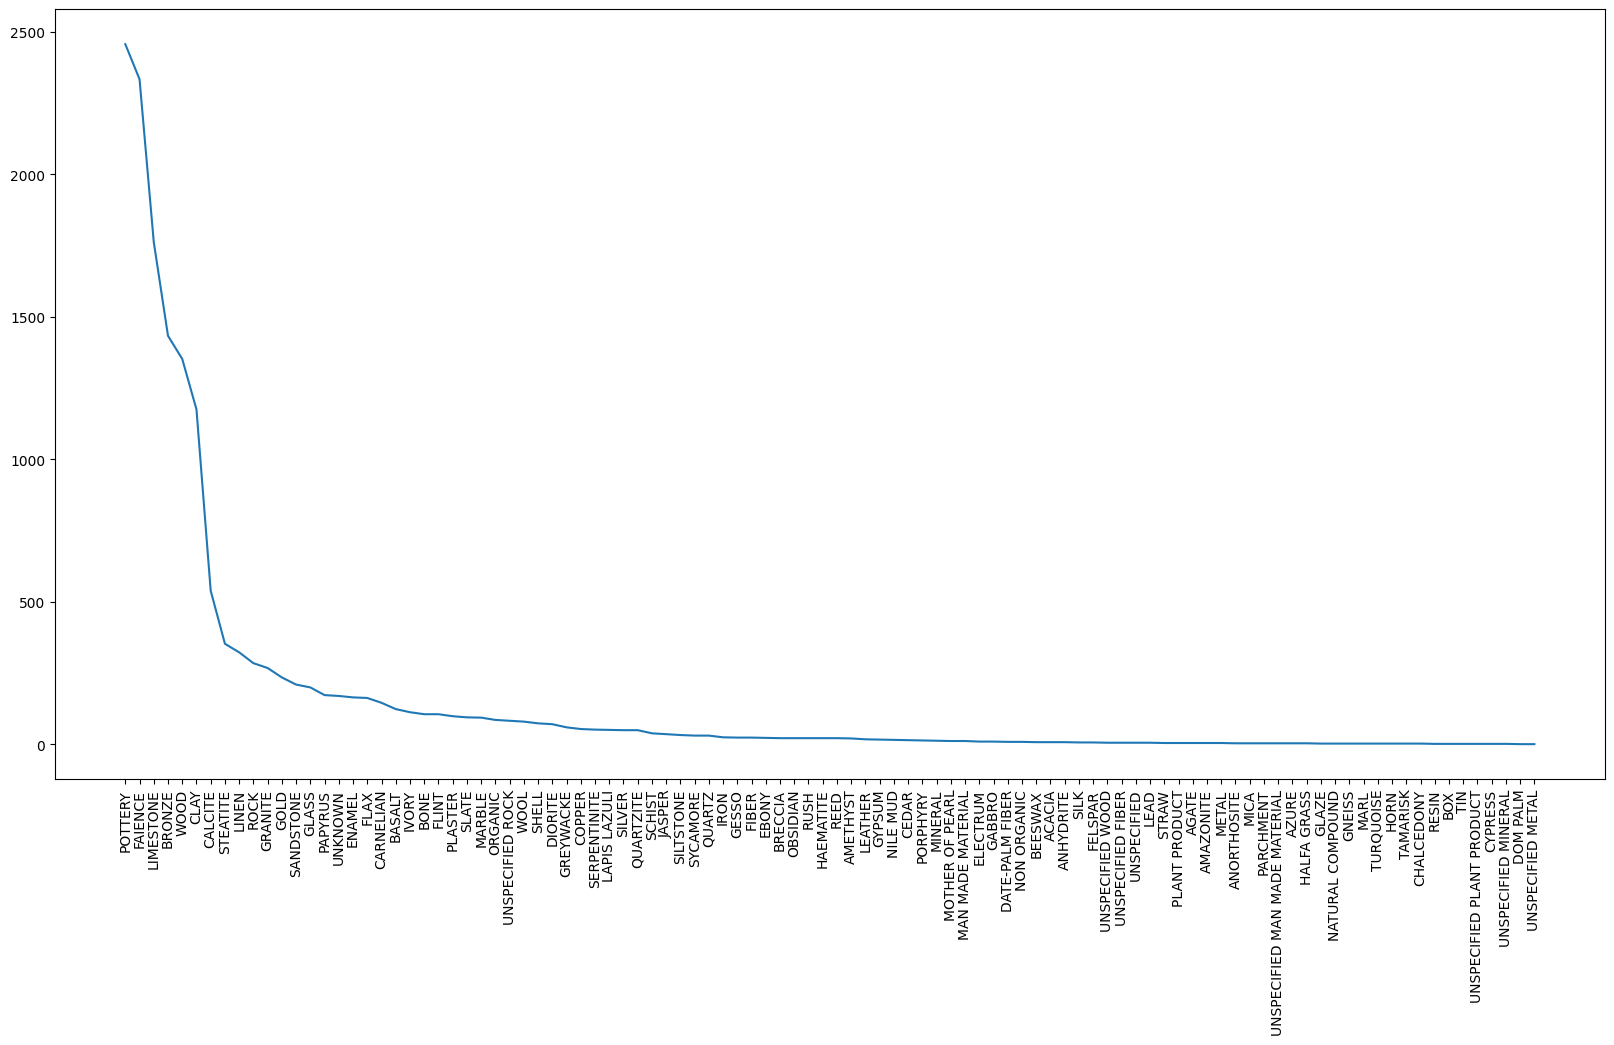

In [41]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(20,10))
plt.xticks(rotation='vertical')
plt.plot(df['Material'].value_counts()[:100])

In [42]:
df2 = df.apply(lambda x: x.astype(str).str.lower())

In [43]:
df2

,Archaeological Site,Category,Material,Dating,Description,Path,Name
0,el-faiyum,relief,limestone,roman period,several late period texts mention a lion god n...,1.json,tithoes
1,unknown,coptic textile,wool,byzantine period,"this piece of fabric is a so-called ""taquetã©'...",10.json,fragment of wedge shape
2,governorate of faiyum,basket,rush,graeco-roman period,this basket comes from the excavations of b. g...,100.json,basket with lid
3,abydos,palette,greywacke,early dynastic period,this fragment of a rectangular palette diagram...,1000.json,fragment of rectangular palette
4,thebes: west bank,finger ring,bronze,unknown,,10000.json,
...,...,...,...,...,...,...,...
15904,unknown,amulet,faience,unknown,,9995.json,
15905,thebes: west bank,necklace,shell,unknown,,9996.json,
15906,unknown,necklace,faience,unknown,,9997.json,
15907,unknown,necklace,faience,unknown,,9998.json,


In [45]:
df2.to_csv("combined_Global.csv")